In [1]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from einops import rearrange
from PIL import Image
from tqdm import tqdm
import json
import time
from pathlib import Path
from sklearn import linear_model
import mediapy as media

In [2]:
ls -lt baselines

 Datentr�ger in Laufwerk C: ist Windows
 Volumeseriennummer: D695-93B7

 Verzeichnis von c:\Pokemon\PokemonRedExperiments


 Verzeichnis von c:\Pokemon\PokemonRedExperiments\baselines

12.02.2024  23:47    <DIR>          .
12.02.2024  19:58    <DIR>          ..
12.02.2024  13:01    <DIR>          __pycache__
12.02.2024  22:45                 6 agent_enabled.txt
12.02.2024  15:21            13.262 cool_poke_data.csv
12.02.2024  11:01                54 delete_empty_imgs.txt
12.02.2024  11:01    <DIR>          grid_renders
12.02.2024  11:01               866 memory_addresses.py
12.02.2024  11:01    <DIR>          ray_exp
12.02.2024  20:14    <DIR>          recordings
12.02.2024  11:01            25.561 red_gym_env.py
12.02.2024  11:01             2.943 render_all_needed_grids.py
12.02.2024  11:01                84 render_all_needed_grids.sh
12.02.2024  11:01             1.841 requirements.txt
12.02.2024  11:01               238 requirements-unfrozen.txt
12.02.2024  11:01             2.806

Datei nicht gefunden


In [3]:
def load_run_data(run_path):
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
    print(f'runs loaded: {len(all_runs)}')
    return all_runs

In [4]:
def plot_runs(
    all_runs, use_keys=None, 
    plot_fit=False, plot_line=False, 
    start=0, group_runs=1,
    agg_func=np.mean):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line, plot_fit):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, y, alpha=alpha, label=name)
        if plot_fit:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
    
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        for m, dat in metrics.items():
            metrics[m] = agg_func(np.array(dat).reshape(-1, group_runs), 1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize = (12, 8))

    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 3.0, plot_line, plot_fit
        )

    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.show()

In [5]:
def get_latest_grid(pth):
    imgs = np.array([np.array(Image.open(p)) for p in Path(pth).glob('curframe*.jpeg')])
    grid = rearrange(imgs, '(h2 w2) h w c -> (h2 h) (w2 w) c', w2=4)
    return grid

In [6]:
'''
get_im_func = lambda: get_latest_grid('baselines/session_8db4b9cd')

with media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:
    for i in range(500):
        #wr.add_image(get_im_func())
        #time.sleep(1)
'''        

"\nget_im_func = lambda: get_latest_grid('baselines/session_8db4b9cd')\n\nwith media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:\n    for i in range(500):\n        #wr.add_image(get_im_func())\n        #time.sleep(1)\n"

In [7]:
def get_latest_grid(pth):
    imgs = np.array([np.array(Image.open(p)) for p in Path(pth).glob('curframe*.jpeg')])
    grid = rearrange(imgs, '(h2 w2) h w c -> (h2 h) (w2 w) c', w2=4)
    return grid


In [8]:
(29556736 - 25952256) / (1024*16*44)

5.0

In [9]:
def plot_runs(
    all_runs, use_keys=None, 
    plot_fit=False, plot_line=False, 
    start=0, group_runs=1,
    agg_func=np.mean):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line, plot_fit):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, y, alpha=alpha, label=name)
        if plot_fit:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
    
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        num_runs = len(all_runs)
        remainder = num_runs % group_runs
        if remainder != 0:
            all_runs = all_runs[:-remainder]
        for m, dat in metrics.items():
            dat = np.array(dat).reshape(-1, group_runs)
            if remainder != 0:
                dat = np.concatenate([dat, np.full((1, remainder), np.nan)], axis=1)
            metrics[m] = agg_func(dat, 1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize = (12, 8))

    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 3.0, plot_line, plot_fit
        )

    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.show()


In [10]:
def plot_runs(
    all_runs, use_keys=None, 
    plot_fit=False, plot_line=False, 
    start=0, group_runs=1,
    agg_func=np.mean):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line, plot_fit):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, y, alpha=alpha, label=name)
        if plot_fit:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
    
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        num_runs = len(all_runs)
        remainder = num_runs % group_runs
        if remainder != 0:
            all_runs = all_runs[:-remainder]
        for m, dat in metrics.items():
            dat = np.array(dat).reshape(-1, group_runs)
            if remainder != 0:
                dat = np.concatenate([dat, np.full((1, remainder), np.nan)], axis=1)
            metrics[m] = agg_func(dat, 1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize = (12, 8))

    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 3.0, plot_line, plot_fit
        )

    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.show()


runs loaded: 336
available metrics: ['event', 'level', 'heal', 'op_lvl', 'dead', 'badge', 'explore', 'total']


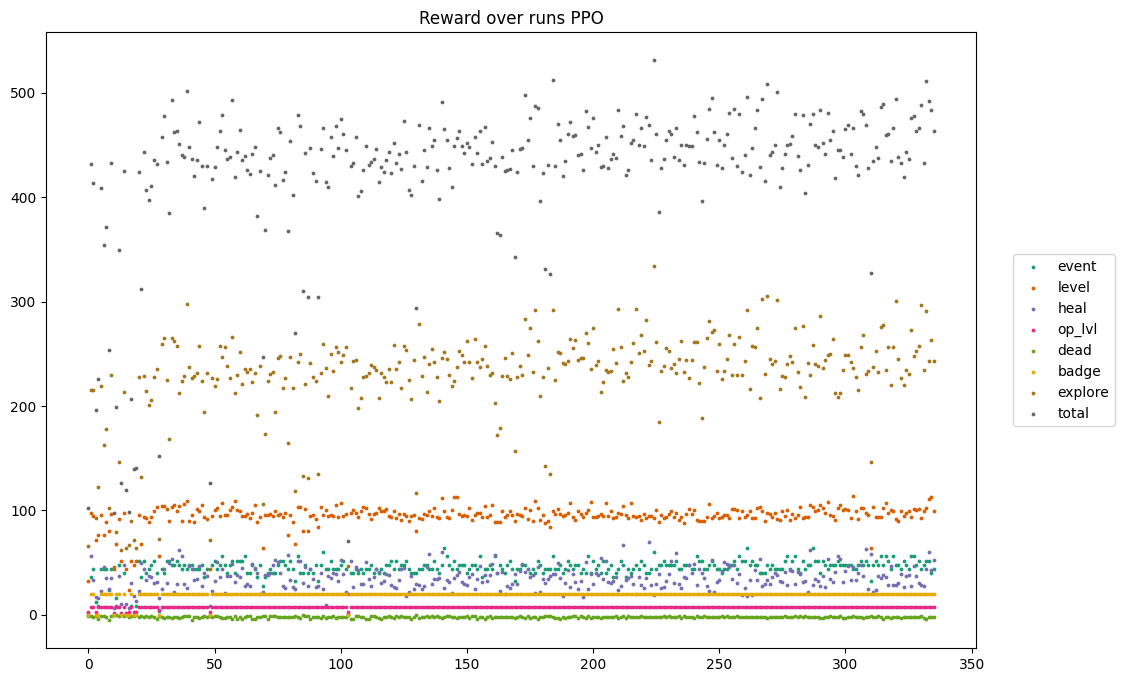

In [11]:
plot_runs(
    load_run_data('baselines/session_826879ff'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)

runs loaded: 336
available metrics: ['event', 'level', 'heal', 'op_lvl', 'dead', 'badge', 'explore', 'total']


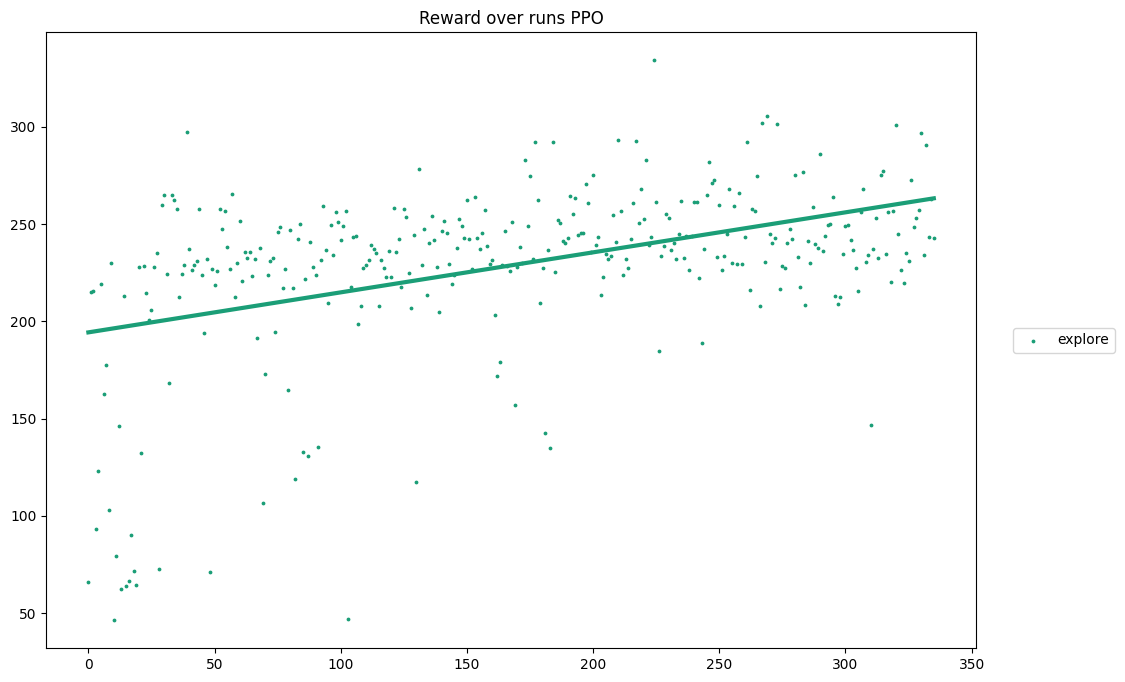

In [12]:

plot_runs(
    load_run_data('baselines/session_826879ff'),
    use_keys=['explore'],
    plot_line=False,
    plot_fit=True,
    start=0,
    group_runs=1,
    agg_func=np.mean
)


runs loaded: 336
available metrics: ['event', 'level', 'heal', 'op_lvl', 'dead', 'badge', 'explore', 'total']


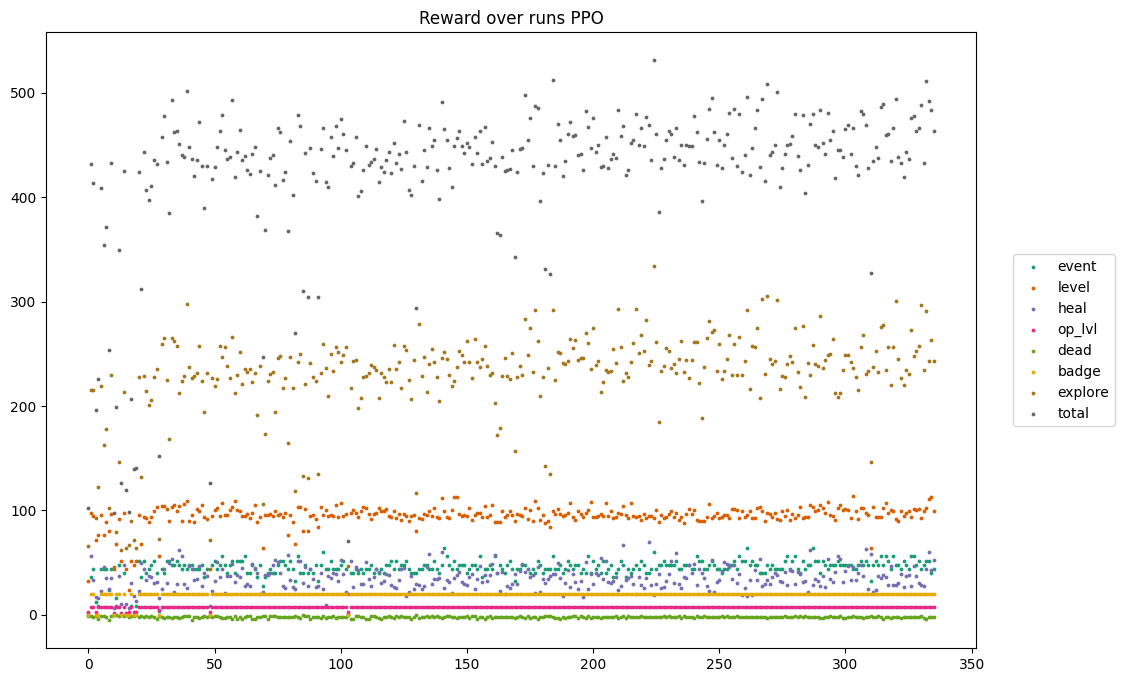

In [13]:

plot_runs(
    load_run_data('baselines/session_826879ff'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=0,
    group_runs=1,
    agg_func=np.mean
)


## generate moving histograms!

In [14]:
len(load_run_data('baselines/session_826879ff'))

runs loaded: 336


336

In [15]:
def chunks(data, n):
    n = max(1, n)
    return [data[i:i+n] for i in range(0, len(data), n)]

In [16]:
full_dat = load_run_data('baselines/session_826879ff')
for run in full_dat:
    run["total"] = sum(value for value in run.values())
full_dat_chunks = chunks(full_dat, 44)

runs loaded: 336


In [17]:
full_dat[0]

{'event': 0,
 'level': 32,
 'heal': 1.8569913072137767,
 'op_lvl': 3.2,
 'dead': -0.8,
 'badge': 0,
 'explore': 66.0,
 'total': 102.25699130721378}

In [18]:
def histo_plot(axis, stat, dat_chunks, version, compare_count):
    
    test_dat = np.array([run[stat] for run in dat_chunks[version]])
    # the histogram of the data
    n, bins, patches = axis.hist(test_dat, 10, density=False, facecolor="orange", alpha=0.95)
    
    for i in range(compare_count):
        comp_version = max(version - 1 - i, 0)
        compare_dat = np.array([run[stat] for run in dat_chunks[comp_version]])
        n, bins, patches = axis.hist(compare_dat, 10, density=False, facecolor="grey", alpha=0.2*0.25**i)

    axis.set(xlabel=f"{stat}")
    #axis.ylabel()
    # only use this title over all plots
    #axis.title()
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    #axis.grid(True)
    #plt.show()

In [19]:
def plot_all(dat_chunks, version, compare_count):
    fig, axs = plt.subplots(2, 4, figsize=(16, 9), dpi=120)
    #plt.subplots_adjust(bottom=0.0, right=0.8, top=0.9)
    fig.suptitle(f"Version {version} Rewards")
    for stat, ax in zip(dat_chunks[0][0].keys(), axs.flatten()):
        histo_plot(ax, stat, dat_chunks, version, compare_count)
    return fig


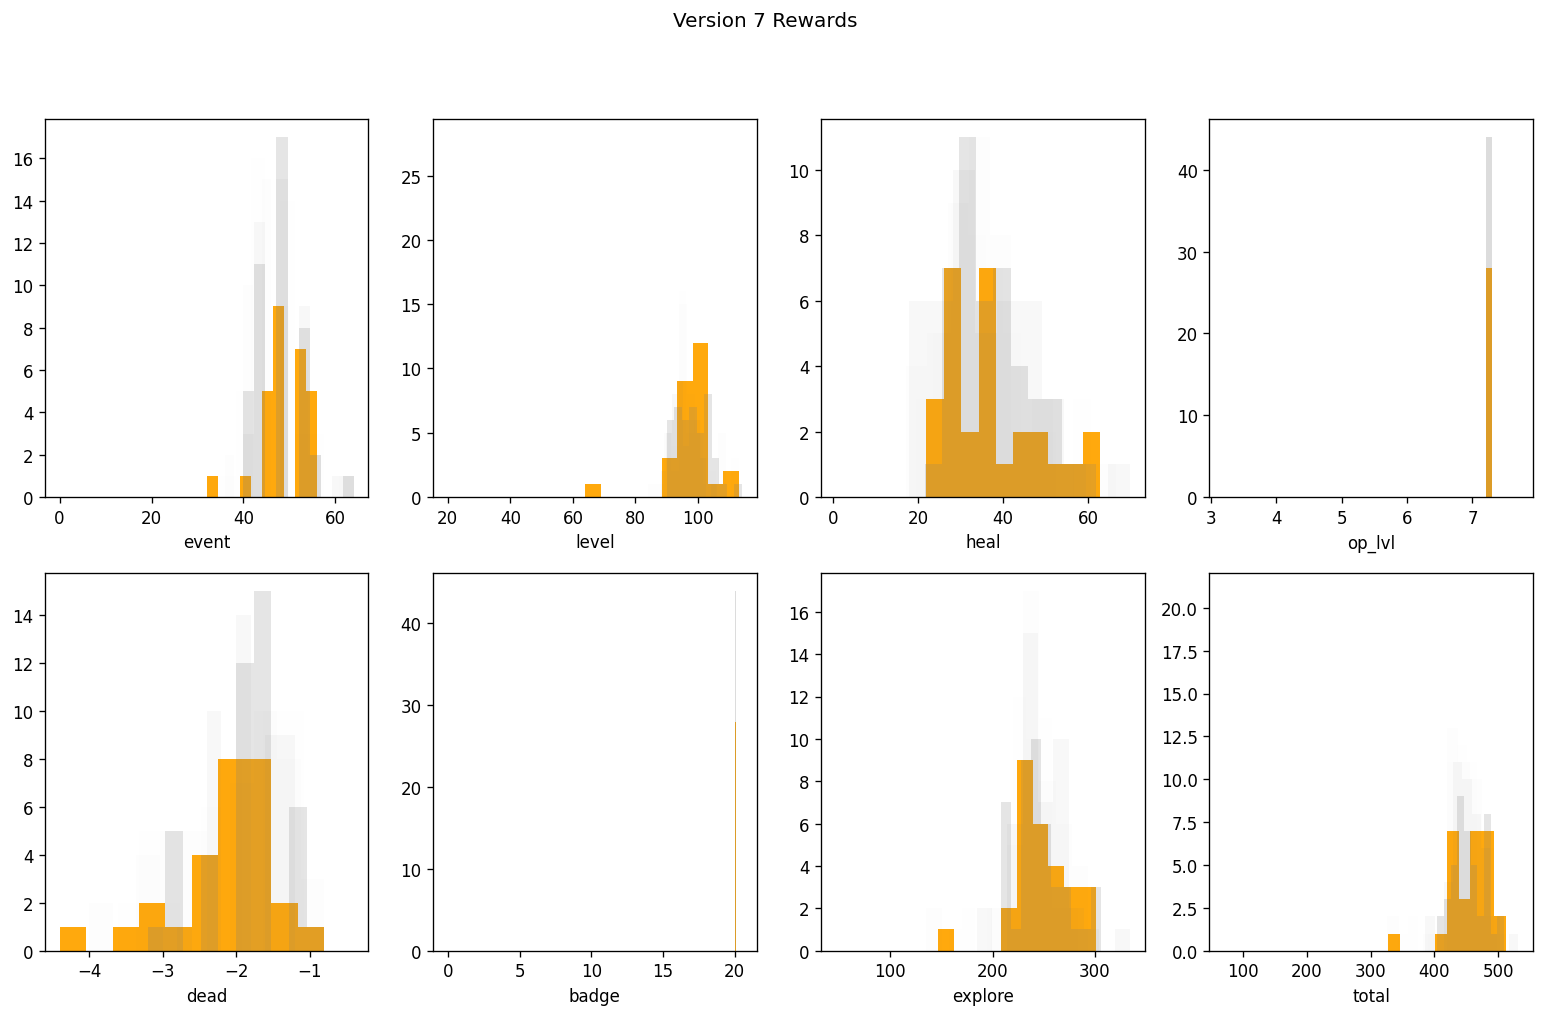

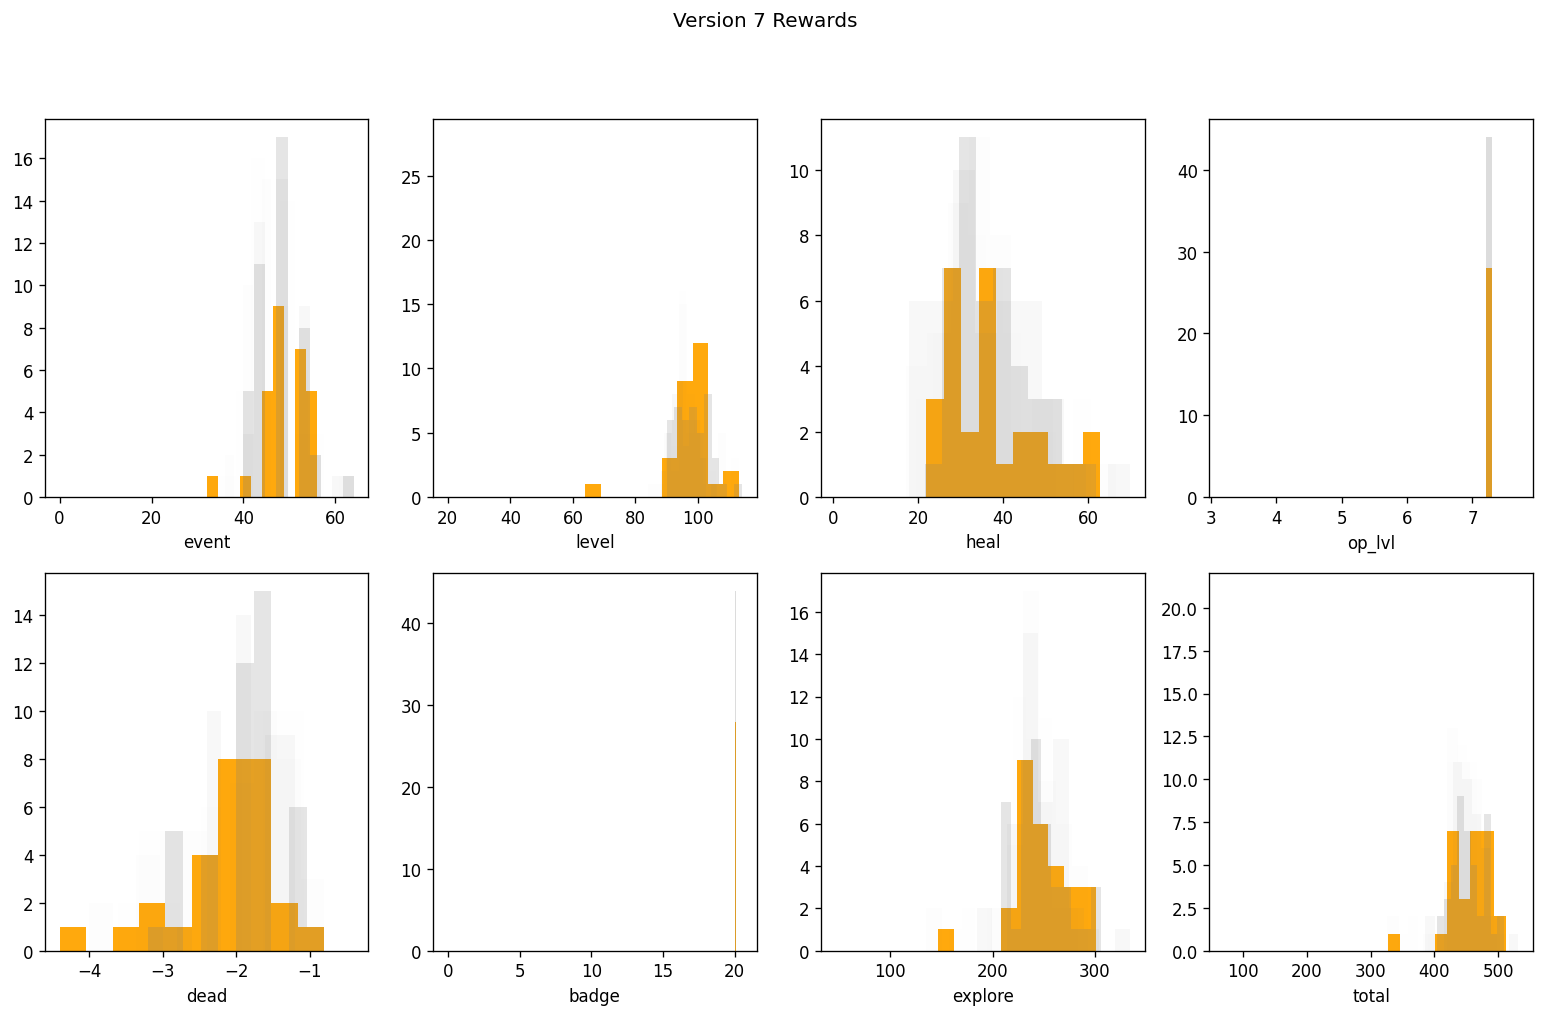

In [20]:
version = min(9, len(chunks(full_dat, 44)) - 1)
plot_all(chunks(full_dat, 44), version, 5)


In [21]:
#histo_plot("level", )

In [23]:
import ffmpeg

with media.VideoWriter('histograms_over_time.mp4', (1080, 1920)) as wr:
    for i in tqdm(range(min(610, len(full_dat_chunks)))):
        fig = plot_all(full_dat_chunks, i, 5)

        fig.canvas.draw()
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        wr.add_image(data)
        plt.show()

RuntimeError: Program 'ffmpeg' is not found; perhaps install ffmpeg using 'apt-get install ffmpeg'.

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# Assuming plot_all and full_dat_chunks are defined

output_dir = "frames"  # Directory to save frames
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

for i in tqdm(range(min(610, len(full_dat_chunks)))):
    fig = plot_all(full_dat_chunks, i, 5)  # Your custom plotting function
    
    # Construct the filename for each frame
    frame_filename = f"{output_dir}/frame_{i:05d}.png"
    
    # Save the plot as an image file
    fig.savefig(frame_filename)
    
    # Close the figure to free memory
    plt.close(fig)


100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


In [ ]:
import ffmpeg

# Define the directory containing the image frames
output_dir = "frames"

# Pattern to match the generated frames
input_pattern = f"{output_dir}/frame_%05d.png"

# Output video filename
output_video = "histograms_over_time.mp4"

# Run FFmpeg to compile the images into a video
(
    ffmpeg
    .input(input_pattern, framerate=10)  # Adjust framerate as needed
    .output(output_video, pix_fmt='yuv420p', vcodec='libx264')
    .run()
)


FileNotFoundError: [WinError 2] Das System kann die angegebene Datei nicht finden

In [ ]:
import ffmpeg

# Example usage
stream = ffmpeg.input('input.mp4')
stream = ffmpeg.output(stream, 'output.mp4')
ffmpeg.run(stream)




FileNotFoundError: [WinError 2] Das System kann die angegebene Datei nicht finden